In [1]:
from pandas import DataFrame
from IPython.display import FileLink

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(DESeq2)
library(phyloseq)
library(plyr); library(dplyr)
library(ggplot2)
library(doParallel)
library(foreach)
library(reshape)
library(RColorBrewer)
library(gridExtra)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:stats’:

    xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, intersect,
    is.unsorted, lapply, Map, mapply, match, mget, order, paste, pmax,
    pmax.int, pmin, pmin.int, Position, rank, rbind, Reduce, rep.int,
    rownames, sapply, setdiff, sort, table, tapply, union, unique,
    unlist, unsplit

Loading required package: IRanges
Loading required package: GenomicRanges
Loading required package:

In [4]:
%%R
dat = read.csv("/home/ashley/priming_exp/data/phy_counts.csv",header=TRUE)

In [5]:
%%R
levels(dat$Treatment)
levels(dat$Treatment) <- c("Cellulose Only", "RE - Continuous", "RE - Pulse")

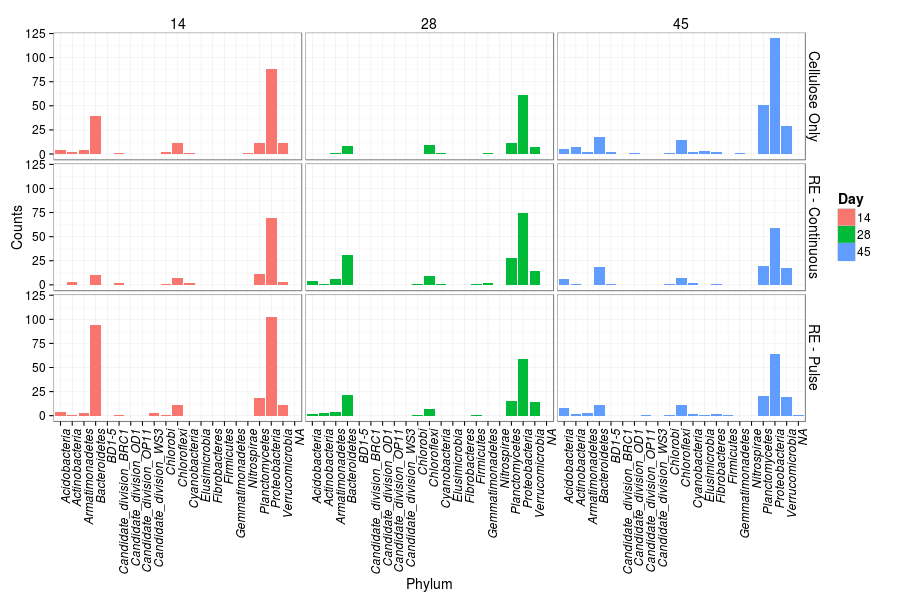

In [29]:
%%R -h 600 -w 900

p2 = ggplot(dat, aes(y = Counts, x = Rank2, fill = factor(Day)))

p2 = p2 + facet_grid(Treatment~Day)

p2 = p2 + geom_bar(stat = "identity", position = "dodge")

p2 = p2 + theme_bw()

p2 = p2 + theme(axis.text.x = element_text(angle = 90, hjust = 1, face = "italic", size = 12), 
              axis.text.y = element_text(size = 12),
              strip.text = element_text(size = 14),
              strip.background = element_blank(),
              axis.title = element_text(size = 14),
              legend.title = element_text(size = 14),
              legend.text = element_text(size = 12))

p2 = p2 + labs(fill = "Day", x = "Phylum")

p2

In [30]:
%%R 
ggsave(plot = p2, filename = "figs/Phylum_PE_bar.pdf", width = 11, height = 7.5)

In [31]:
FileLink("figs/Phylum_PE_bar.pdf")

/home/ashley/priming_exp/figs/Phylum_PE_bar.pdf

In [32]:
%%R 
png("figs/Phylum_PE_bar.png", width = 11.5, height = 7.5, units = "in", res = 600)
grid.arrange(p2, ncol = 1)
dev.off()

png 
  2 


In [33]:
FileLink("figs/Phylum_PE_bar.png")

/home/ashley/priming_exp/figs/Phylum_PE_bar.png

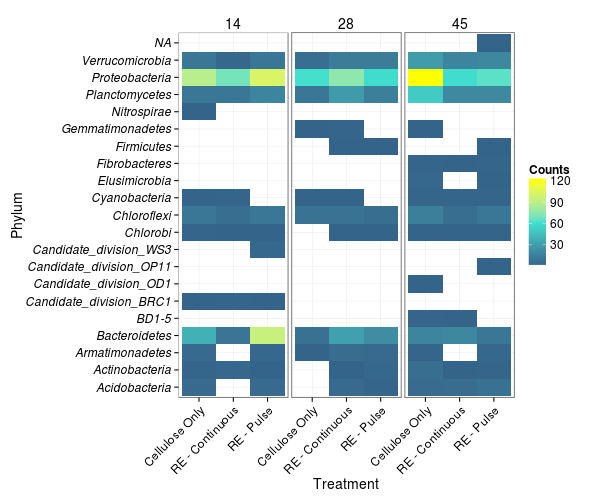

In [11]:
%%R -h 500 -w 600
p = ggplot(dat, aes(fill = Counts, y = Rank2, x = Treatment))

p = p + facet_wrap(~Day)

p = p + geom_tile()           
           
p = p + theme_bw()

p = p + scale_fill_gradientn(colours = c("steelblue4","turquoise","yellow")) #rev(rainbow(2)))

p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size = 12), 
              axis.text.y = element_text(face = "italic", size = 12),
              strip.text = element_text(size = 14),
              strip.background = element_blank(),
              axis.title = element_text(size = 14),
              legend.title = element_text(size = 12),
              legend.text = element_text(size = 12))
p = p + labs(y = "Phylum")

p

In [12]:
%%R 
ggsave(plot = p, filename = "figs/Phylum_PE_heat.pdf", width = 8, height = 6)

In [13]:
FileLink("figs/Phylum_PE_heat.pdf")

/home/ashley/priming_exp/figs/Phylum_PE_heat.pdf

In [14]:
%%R 
png("figs/Phylum_PE_heat.png", width = 8, height = 6, units = "in", res = 600)
grid.arrange(p, ncol = 1)
dev.off()

png 
  2 


In [15]:
FileLink("figs/Phylum_PE_heat.png")

/home/ashley/priming_exp/figs/Phylum_PE_heat.png